#### Load Important Libraries

In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')

#### Reading the Population and Death Data

In [492]:
data_file = 'death_population_final_combined.xlsx'

# Read the files
data = pd.read_excel(data_file)
data.head()

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population
0,2001,Afghanistan,485.0,20.0,10.0,17.0,AFG,19688632.0
1,2002,Afghanistan,4083.0,1391.0,0.0,0.0,AFG,21000256.0
2,2003,Afghanistan,137.0,4.0,0.0,0.0,AFG,22645130.0
3,2004,Afghanistan,18.0,40.0,0.0,0.0,AFG,23553551.0
4,2005,Afghanistan,570.0,44.0,5050.0,7568.0,AFG,24411191.0


In [493]:
# Assuming 'data' is your DataFrame and 'country' is the column name
number_of_countries = data['country'].nunique()

print("Number of unique countries:", number_of_countries)

Number of unique countries: 202


In [494]:
# Grouping data by year and summing up the total deaths and populations
grouped_data = data.groupby('year').agg({'total_deaths': 'sum', 'population': 'sum'}).reset_index()

# Calculating the mortality rate per 100,000 people for each year and country
grouped_data['mortality_rate'] = (grouped_data['total_deaths'] / grouped_data['population']) * 1000000

grouped_data.head()

,year,total_deaths,population,mortality_rate
0,2001,39258.0,6.199164e+09,6.332790
1,2002,21251.0,6.280729e+09,3.383524
2,2003,113518.0,6.361828e+09,17.843614
3,2004,244623.0,6.443051e+09,37.966949
4,2005,93392.0,6.524577e+09,14.313879


In [495]:
grouped_data.isna().sum()

year              0
total_deaths      0
population        0
mortality_rate    0
dtype: int64

In [496]:
# Filter the data for Afghanistan
selected_group = 'World'
group = grouped_data

group.tail()

,year,total_deaths,population,mortality_rate
18,2019,22674.0,7.711595e+09,2.940248
19,2020,15587.0,7.789777e+09,2.000956
20,2021,14577.0,7.856962e+09,1.855297
21,2022,80064.0,7.920118e+09,10.108940
22,2023,62608.0,7.990276e+09,7.835524


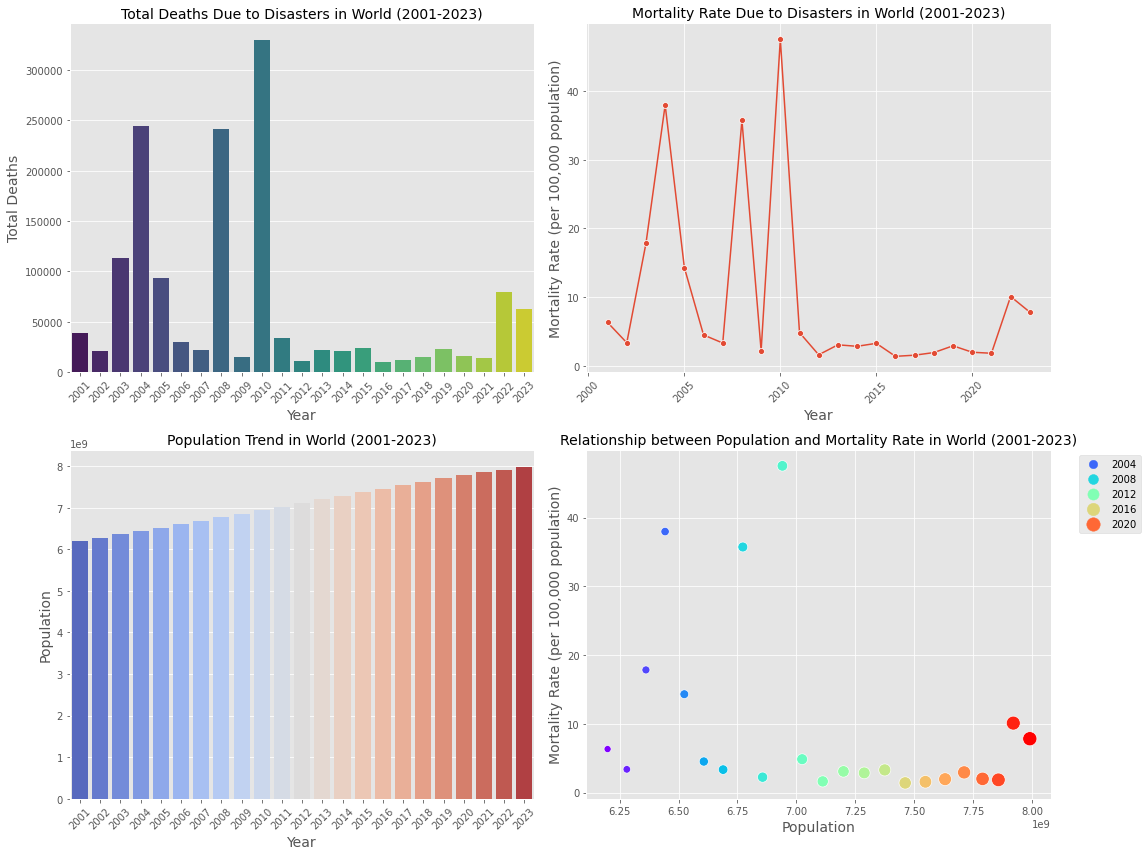

In [497]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar plot to visualize total deaths each year
sns.barplot(data=group, x='year', y='total_deaths', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title(f'Total Deaths Due to Disasters in {selected_group} (2001-2023)', fontsize = 14)
axs[0, 0].set_xlabel('Year', fontsize = 14)
axs[0, 0].set_ylabel('Total Deaths', fontsize = 14)
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Line plot for mortality rate over the years
sns.lineplot(data=group, x='year', y='mortality_rate', marker='o', ax=axs[0, 1])
axs[0, 1].set_title(f'Mortality Rate Due to Disasters in {selected_group} (2001-2023)', fontsize = 14)
axs[0, 1].set_xlabel('Year', fontsize = 14)
axs[0, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Bar plot to show the population trend over the years
sns.barplot(data=group, x='year', y='population', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title(f'Population Trend in {selected_group} (2001-2023)', fontsize = 14)
axs[1, 0].set_xlabel('Year', fontsize = 14)
axs[1, 0].set_ylabel('Population', fontsize = 14)
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Scatter plot to visualize the relationship between the population and the mortality rate
sns.scatterplot(data=group, x='population', y='mortality_rate', hue='year', palette='rainbow', size='year', sizes=(50, 200), ax=axs[1, 1])
axs[1, 1].set_title(f'Relationship between Population and Mortality Rate in {selected_group} (2001-2023)', fontsize = 14)
axs[1, 1].set_xlabel('Population', fontsize = 14)
axs[1, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()


In [498]:
# Data preparation for Prophet
#pip install prophet-1.1.5-py3-none-win_amd64.whl
from prophet import Prophet
prophet_data = group[['year', 'mortality_rate']]
prophet_data.columns = ['ds', 'y']

# Convert year into proper datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'].astype(str) + '-12-31')
prophet_data['y'] = prophet_data['y']

# Calculate the median for the entire dataset
# overall_median = prophet_data['y'].median()
# # Replace values in 'y' with this median
# prophet_data.loc[prophet_data['ds'].dt.year == 2022, 'y'] = overall_median

# Filter out the year 2004 from historical data
#prophet_data = prophet_data[~prophet_data['ds'].dt.year.isin([2004])]
# Assuming your DataFrame is named 'prophet_data' and the target column is 'y'
#prophet_data['y'] = prophet_data['y'].replace(0, 0.1)
prophet_data.tail()

,ds,y
18,2019-12-31,2.940248
19,2020-12-31,2.000956
20,2021-12-31,1.855297
21,2022-12-31,10.108940
22,2023-12-31,7.835524


For Prophet:
The data is structured in a DataFrame with two columns:

ds: Represents the date (timestamp) set to the end of each year.

y: The mortality rate to be forecasted.

Now, let's move on to the Prophet forecasting:

18:16:37 - cmdstanpy - INFO - Chain [1] start processing
18:16:37 - cmdstanpy - INFO - Chain [1] done processing


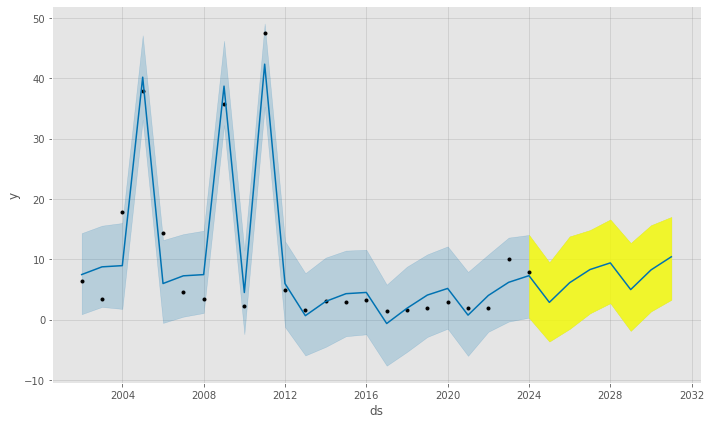

In [499]:
# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2004-12-31','2008-12-31','2010-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with additional parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    #seasonality_mode='multiplicative',
    seasonality_mode='additive',
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=150,
    #holidays_prior_scale=100,
    mcmc_samples=0
)
# Add a custom yearly seasonality
#model.add_seasonality(name='yearly', period=365.25, fourier_order=12)  # Replace `N` with the desired number of Fourier terms

model.fit(prophet_data)
# changepoint_prior_scale=2
# Forecasting for 2023 to 2025
future_dates = model.make_future_dataframe(periods=7, freq='Y')
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)

# Highlight the prediction (2023-2025) with a different color
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 where=(forecast['ds'] >= '2023-12-31'), color='yellow', alpha=0.8)

#from prophet.plot import add_changepoints_to_plot
#a = add_changepoints_to_plot(fig.gca(), model, forecast)

plt.show()

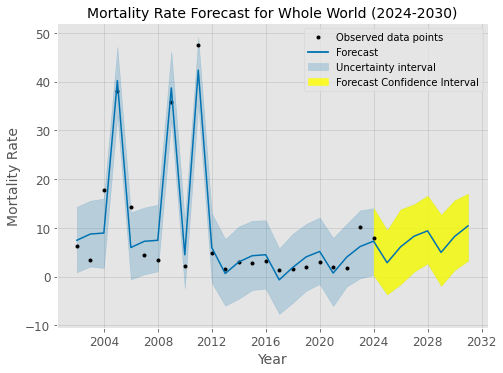

In [500]:
# Plot the forecast
#forecast =forecast[forecast['ds'].dt.year > 2004]
fig = model.plot(forecast, figsize=(7, 5), uncertainty=True)

# Highlight the prediction (2023-2025) with a different color for the confidence interval
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 where=(forecast['ds'] >= '2023-12-31'), color='yellow', alpha=0.8, label='Forecast Confidence Interval')

# Customize the plot
ax = fig.gca()
ax.tick_params(axis='both', labelsize=12)  # Adjust labelsize as needed
ax.set_xlabel('Year', fontsize=14)  # Set the X-axis label
ax.set_ylabel('Mortality Rate', fontsize=14)  # Set the Y-axis label
ax.set_title(f'Mortality Rate Forecast for Whole {selected_group} (2024-2030)', fontsize=14)  # Set the title
#ax.set_ylim(-1, 6)

# Add legend
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(1.8)  # Set the linewidth of the legend lines
plt.show()
# Save the figure
fig.savefig(f'mortality_rate_forecast_{selected_group}.pdf', format='pdf', bbox_inches='tight')
fig.savefig(f'mortality_rate_forecast_{selected_group}.png', format='png', dpi=600, bbox_inches='tight')

In [501]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))

           ds       yhat  yhat_lower  yhat_upper
23 2024-12-31   2.856544   -3.627362    9.474638
24 2025-12-31   6.116386   -1.530250   13.775294
25 2026-12-31   8.294560    1.044975   14.824462
26 2027-12-31   9.395796    2.734524   16.580768
27 2028-12-31   4.972743   -1.859572   12.673969
28 2029-12-31   8.232585    1.367603   15.628290
29 2030-12-31  10.410760    3.292886   16.997807


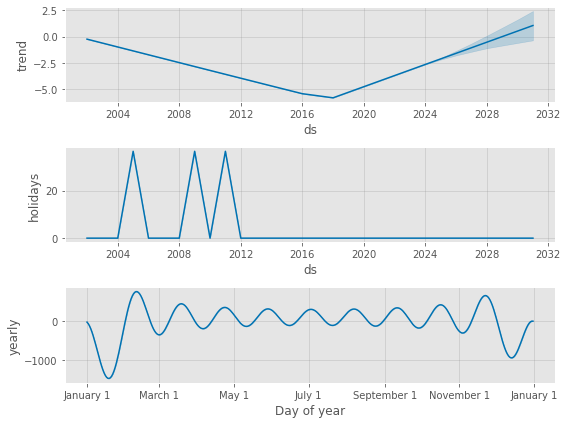

In [502]:
# Displaying components of the forecast
fig2 = model.plot_components(forecast, figsize=(8, 6))

In [503]:
# Adjust the last 7 'yhat_lower' entries to zero if they are negative and calculate the means for those entries
forecast.loc[forecast.index[-7:], 'yhat_lower'] = forecast['yhat_lower'][-7:].apply(lambda x: max(x, 0))

# Now calculate the mean of the 'yhat_lower' and 'yhat_upper' for the last 7 entries
mean_lower_last_7 = forecast['yhat_lower'][-7:].mean()
mean_upper_last_7 = forecast['yhat_upper'][-7:].mean()

mean_lower_last_7, mean_upper_last_7

(1.205712476882473, 14.279318347305844)

In [504]:
# Print the forecast
print(forecast[['yhat']].tail(7))

         yhat
23   2.856544
24   6.116386
25   8.294560
26   9.395796
27   4.972743
28   8.232585
29  10.410760


#### BenchMark Strategy 1

In [505]:
# Calculate historical mean
historical_mean = group['mortality_rate'].mean()
print(f"Historical Mean Mortality Rate: {historical_mean}")

# Selecting only the years 2024 to 2030 for the calculation
forecast_data = forecast[(forecast['ds'] >= "2024-12-31") & (forecast['ds'] <= "2030-12-31")]

# Calculate forecast mean
forecast_mean = forecast_data['yhat'].mean()
print(f"Forecast Mean Mortality Rate: {forecast_mean}")

# Check for reduction
reduction_25 = historical_mean * 0.75
reduction_50 = historical_mean * 0.50

print(f"25% Reduction Threshold: {reduction_25}")
print(f"50% Reduction Threshold: {reduction_50}")

# Check for 25% Reduction
if forecast_mean <= reduction_25:
    print("Yes:25% reduction")
else:
    print("No: 25% reduction")

# Check for 50% Reduction
if forecast_mean <= reduction_50:
    print("Yes:50% reduction")
else:
    print("No: 50% reduction")

Historical Mean Mortality Rate: 9.50502385108275
Forecast Mean Mortality Rate: 7.182767572574325
25% Reduction Threshold: 7.128767888312063
50% Reduction Threshold: 4.752511925541375
No: 25% reduction
No: 50% reduction
